In [9]:
"""
    @file    Top10LotteryNumbersByExcel.ipynb
    @date    2020-11-17
    @author  편효범 studiohayden2020@gmail.com
    @brief   목표: xlsx 데이터 시각화
    
    1. 데이터 다운로드 & 간단정리
        - 아래의 사이트에서 역대 로또당첨번호 xls 파일 다운로드
        - https://www.dhlottery.co.kr/gameResult.do?method=byWin
        - 구글드라이브에서 xls열고 셀병합 풀기
        - 다른이름으로 xlsx 타입으로 저장
    2. pandas와 numpy로 데이터 추출
    3. matlablib와 seaborn으로 데이터 시각화
"""

import pandas as pd
import numpy as np

df = pd.read_excel(r'C:\Users\Playdata\Desktop\lotto_data_visualize\lotto_excel.xlsx') # 본인이 지정한 xlsx 절대경로 사용할것
print(type(df)) # type 확인
df # dataFrame 확인

<class 'pandas.core.frame.DataFrame'>


,년도,회차,추첨일,1등,Unnamed: 4,2등,Unnamed: 6,3등,Unnamed: 8,4등,Unnamed: 10,5등,Unnamed: 12,당첨번호1,당첨번호2,당첨번호3,당첨번호4,당첨번호5,당첨번호6,Unnamed: 19
0,NaN,NaN,NaN,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,1,2,3,4,5,6,보너스
1,2020.0,937.0,2020.11.14,11,"2,058,420,819원",57,"66,206,518원",2480,"1,521,683원",124141,"50,000원",2092601,"5,000원",2,10,13,22,29,40,26
2,NaN,936.0,2020.11.07,14,"1,492,069,179원",77,"45,214,218원",2864,"1,215,606원",140160,"50,000원",2252623,"5,000원",7,11,13,17,18,29,43
3,NaN,935.0,2020.10.31,13,"1,711,055,424원",120,"30,894,057원",2933,"1,263,992원",134376,"50,000원",2118071,"5,000원",4,10,20,32,38,44,18
4,NaN,934.0,2020.10.24,4,"5,765,772,844원",66,"58,240,130원",2359,"1,629,440원",116726,"50,000원",1985417,"5,000원",1,3,30,33,36,39,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,NaN,5.0,2003.01.04,0,0원,0,0원,42,"6,033,800원",3043,"166,500원",60434,"10,000원",16,24,29,40,41,42,3
934,2002.0,4.0,2002.12.28,0,0원,1,"211,191,200원",29,"7,282,400원",2777,"152,100원",52382,"10,000원",14,27,30,31,40,42,2
935,NaN,3.0,2002.12.21,1,"2,000,000,000원",0,0원,139,"1,174,100원",5940,"54,900원",73256,"10,000원",11,16,19,21,27,31,30
936,NaN,2.0,2002.12.14,1,"2,002,006,800원",2,"94,866,800원",103,"1,842,000원",3763,"100,800원",55480,"10,000원",9,13,21,25,32,42,2


In [10]:
# 당첨번호 columns 및 역대회차 937회 rows 추출 (weeks 52기준 2020년)

Lucky_nums = (df.loc[1:937, ['당첨번호1', '당첨번호2', '당첨번호3', '당첨번호4', '당첨번호5', '당첨번호6']])
Lucky_nums

,당첨번호1,당첨번호2,당첨번호3,당첨번호4,당첨번호5,당첨번호6
1,2,10,13,22,29,40
2,7,11,13,17,18,29
3,4,10,20,32,38,44
4,1,3,30,33,36,39
5,23,27,29,31,36,45
...,...,...,...,...,...,...
933,16,24,29,40,41,42
934,14,27,30,31,40,42
935,11,16,19,21,27,31
936,9,13,21,25,32,42


In [3]:
# Example of using tolist to Convert Pandas DataFrame into a List
# DataFrame을 다차원 List로 변환 

DataFrame = pd.DataFrame(Lucky_nums, columns=['당첨번호1', '당첨번호2', '당첨번호3', '당첨번호4', '당첨번호5', '당첨번호6'])

Lucky_nums_list = DataFrame.values.tolist()

print(Lucky_nums_list)

[[2, 10, 13, 22, 29, 40], [7, 11, 13, 17, 18, 29], [4, 10, 20, 32, 38, 44], [1, 3, 30, 33, 36, 39], [23, 27, 29, 31, 36, 45], [1, 6, 15, 36, 37, 38], [14, 15, 23, 25, 35, 43], [8, 21, 25, 38, 39, 44], [7, 9, 12, 15, 19, 23], [3, 4, 10, 20, 28, 44], [4, 15, 22, 38, 41, 43], [10, 16, 18, 20, 25, 31], [13, 24, 32, 34, 39, 42], [3, 11, 34, 42, 43, 44], [3, 17, 18, 23, 36, 41], [2, 6, 13, 17, 27, 43], [5, 7, 12, 22, 28, 41], [2, 3, 26, 33, 34, 43], [9, 14, 17, 18, 42, 44], [7, 11, 12, 31, 33, 38], [1, 3, 23, 24, 27, 43], [6, 21, 22, 32, 35, 36], [2, 6, 11, 13, 22, 37], [16, 19, 24, 33, 42, 44], [6, 14, 16, 21, 27, 37], [5, 8, 18, 21, 22, 38], [4, 5, 12, 14, 32, 42], [1, 11, 17, 27, 35, 39], [7, 24, 29, 30, 34, 35], [3, 16, 21, 22, 23, 44], [21, 27, 29, 38, 40, 44], [2, 5, 14, 28, 31, 32], [3, 4, 16, 27, 38, 40], [2, 6, 8, 26, 43, 45], [2, 15, 16, 21, 22, 28], [7, 19, 23, 24, 36, 39], [5, 18, 20, 23, 30, 34], [7, 13, 16, 18, 35, 38], [8, 19, 20, 21, 33, 39], [18, 21, 28, 35, 37, 42], [6, 7, 

In [4]:
# 2차원 리스트에서 번호별 빈도수 추출하기, for 구문 사용
# 인덱스 카운트 때문에 0부터 시작
# 갓도원씨가 짜준 코드

Frequency = []

for i in range(0,46):
    Frequency_count = sum(x.count(i) for x in Lucky_nums_list)
    Frequency.append(Frequency_count)
    
print(Frequency)

[0, 131, 123, 125, 127, 128, 118, 125, 125, 95, 129, 127, 133, 132, 132, 126, 121, 136, 136, 129, 131, 125, 106, 113, 123, 121, 125, 138, 116, 114, 112, 126, 109, 130, 146, 114, 124, 128, 127, 134, 133, 113, 121, 139, 125, 131]


In [5]:
# 시리즈 형식으로 변환 (row는 공번호순, column은 번호순 빈도)

Lottery_df = pd.DataFrame({'':Frequency})

Lottery_df

,
0,0
1,131
2,123
3,125
4,127
5,128
6,118
7,125
8,125
9,95


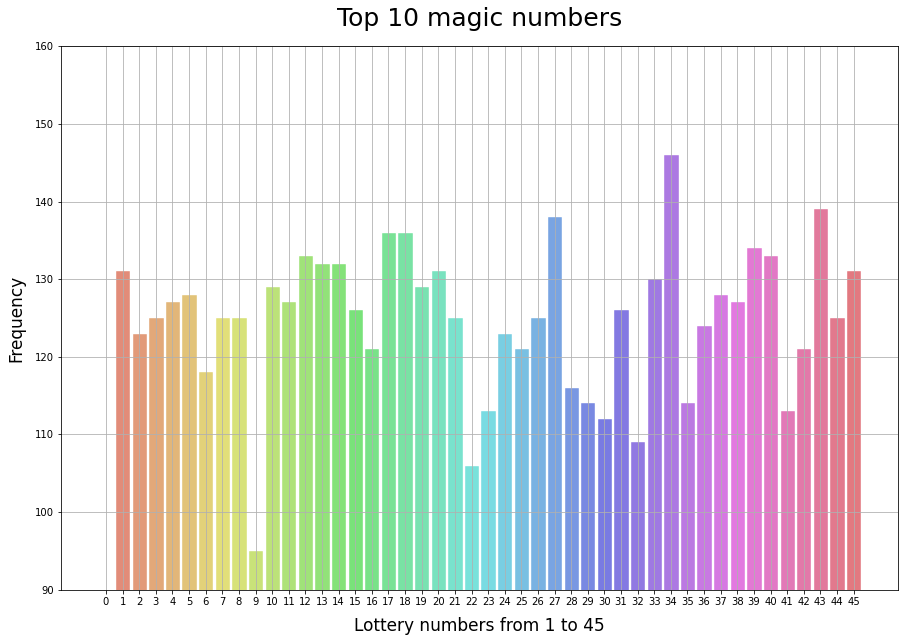

In [57]:
# 데이터 시각화, 아래는 참조 사이트
# https://zephyrus1111.tistory.com/9
# https://cyan91.tistory.com/35
# https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# 그래프 그리기
fig = plt.figure(figsize=(15,10)) # Figure 생성 사이즈

# Y축 리밋
plt.ylim(90, 160)

# bar_label = Lottery_df
x_label = [i for i in range(0, 46)]
xtick_label_position = list(x_label) # x축 눈금 라벨이 표시될 x좌표
colors = sns.color_palette('hls',len(x_label))

# 시각화
tick_size = 10
axis_label_size = 13

plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, x_label, fontsize=tick_size) 

# 바 차트 출력, 막대기 색 설정
plt.bar(xtick_label_position, Frequency, color=colors, edgecolor=colors, alpha=0.8, linewidth=0.5)
plt.grid(True)


# 라벨 및 타이틀 출력

plt.xlabel('Lottery numbers from 1 to 45', fontsize = 17, labelpad =10)
plt.ylabel('Frequency', fontsize = 17, labelpad = 10)
plt.title('Top 10 magic numbers', fontsize = 25, pad = 20)

# Top10 번호 표시하기 
# plt.text(34.0, 145, '★text')

plt.savefig(r"C:\Users\Playdata\Desktop\lotto_data_visualize\lotto_data_visualize.png", dpi = 100)
plt.show()